In [447]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

In [182]:
def make_segments(x, y):
    '''
    Create list of line segments from x and y coordinates, in the correct format for LineCollection:
    an array of the form   numlines x (points per line) x 2 (x and y) array
    '''

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    return segments


# Interface to LineCollection:

def colorline(x, y, z=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0), linewidth=3, alpha=1.0):
    '''
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    '''
    
    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))
           
    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])
        
    z = np.asarray(z)
    
    segments = make_segments(x, y)
    lc = LineCollection(segments, array=z, cmap=cmap, norm=norm, linewidth=linewidth, alpha=alpha)
    
    ax = plt.gca()
    ax.add_collection(lc)
    
    return lc
        
    
def clear_frame(ax=None): 
    # Taken from a post by Tony S Yu
    if ax is None: 
        ax = plt.gca() 
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False) 
    for spine in ax.spines.itervalues(): 
        spine.set_visible(False) 

In [493]:
def competing_species_function(x, y, parameters):
    a1, b12, b11, a2, b21, b22 = parameters
    return (a1*x-b12*x*y-b11*x*x, a2*y-b21*x*y-b22*y*y)

In [494]:
def runge_kutta(iterations, initial, step, parameters):
    x_val = [initial[0]]
    y_val = [initial[1]]
    t_val = [0]
    for i in range(round(iterations/step)):
        x1, y1 = competing_species_function(x_val[-1], y_val[-1], parameters)
        x2, y2 = competing_species_function(x_val[-1]+step*x1/2, y_val[-1]+step*y1/2, parameters)
        x3, y3 = competing_species_function(x_val[-1]+step*x2/2, y_val[-1]+step*y2/2, parameters)
        x4, y4 = competing_species_function(x_val[-1]+step*x3, y_val[-1]+step*y3, parameters)
        
        x_val.append(x_val[-1]+step*(x1+2*x2+2*x3+x4)/6)
        y_val.append(y_val[-1]+step*(y1+2*y2+2*y3+y4)/6)
        t_val.append(t_val[-1]+step)
    return t_val, x_val, y_val

In [495]:
parameters = (1, 1, 1, 3/4, 1/2, 1)
iterations = 50
step = 0.1

In [504]:
initial_list = [(0.1*np.sin(i*np.pi/40), 0.1*np.cos(i*np.pi/40)) for i in range(20)]
rk_results = list(map(lambda initial: runge_kutta(iterations, initial, step, parameters), initial_list))

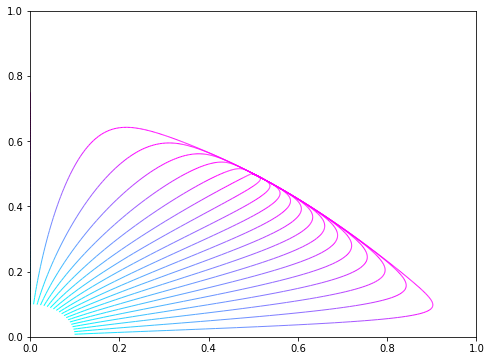

In [505]:
for setting in rk_results:
    colorline(setting[1], setting[2], cmap=plt.get_cmap('cool'), norm=plt.Normalize(0.0, 0.1), linewidth=1)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

In [545]:
initial_list = [(i/1000, 0.8) for i in range(1, 50)]+[(i/1000, 0.6) for i in range(1, 50)]
rk_results = list(map(lambda initial: runge_kutta(iterations, initial, step, parameters), initial_list))

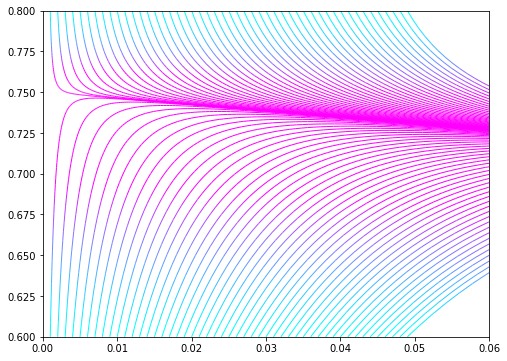

In [546]:
for setting in rk_results:
    colorline(setting[1], setting[2], cmap=plt.get_cmap('cool'), norm=plt.Normalize(0.0, 0.03), linewidth=1)
    plt.xlim(0, 0.06)
    plt.ylim(0.6, 0.8)

In [557]:
initial_list = [(0.8 + i/100, 0.01) for i in range(1, 40)]
rk_results = list(map(lambda initial: runge_kutta(iterations, initial, step, parameters), initial_list))

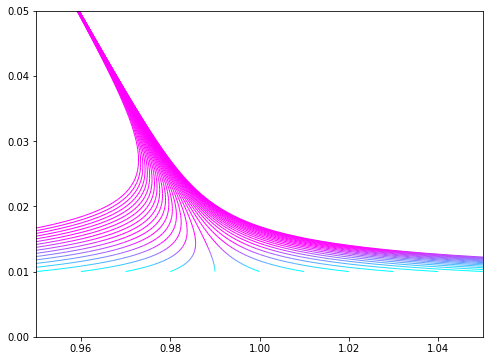

In [560]:
for setting in rk_results:
    colorline(setting[1], setting[2], cmap=plt.get_cmap('cool'), norm=plt.Normalize(0.0, 0.03), linewidth=1)
    plt.xlim(0.95, 1.05)
    plt.ylim(0.00, 0.05)

In [564]:
initial_list = [(0.4*np.sin(i*np.pi/18)+0.5, 0.4*np.cos(i*np.pi/18)+0.5) for i in range(36)]
rk_results = list(map(lambda initial: runge_kutta(iterations, initial, step, parameters), initial_list))

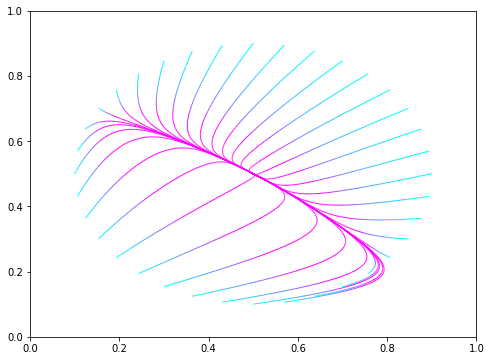

In [565]:
for setting in rk_results:
    colorline(setting[1], setting[2], cmap=plt.get_cmap('cool'), norm=plt.Normalize(0.0, 0.03), linewidth=1)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

In [577]:
temp = np.array([[(i/10, j/10) for j in range(11)]  for i in range(11)])
initial_list = []
for i in temp:
    for j in i:
        initial_list.append(j)
rk_results = list(map(lambda initial: runge_kutta(iterations, initial, step, parameters), initial_list))

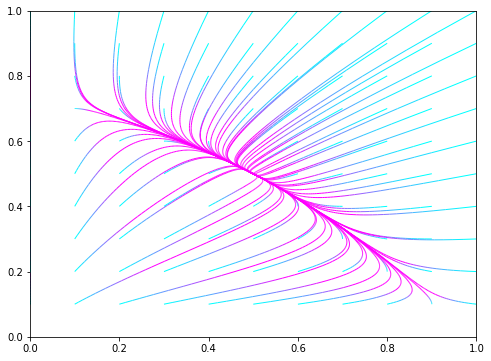

In [578]:
for setting in rk_results:
    colorline(setting[1], setting[2], cmap=plt.get_cmap('cool'), norm=plt.Normalize(0.0, 0.03), linewidth=1)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

In [585]:
temp = np.array([[(i/10, j/10) for j in range(21)]  for i in range(21)])
initial_list = []
for i in temp:
    for j in i:
        initial_list.append(j)
rk_results = list(map(lambda initial: runge_kutta(iterations, initial, step, (0.4, 0.6, 0.1, 0.5, 0.6, 0.2)), initial_list))

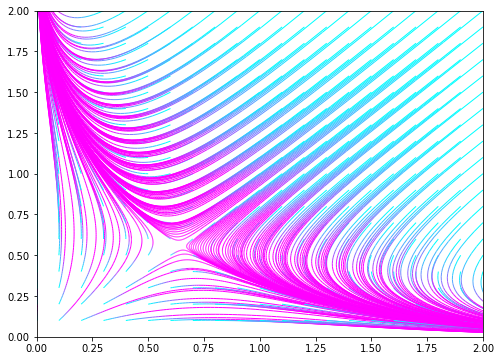

In [586]:
for setting in rk_results:
    colorline(setting[1], setting[2], cmap=plt.get_cmap('cool'), norm=plt.Normalize(0.0, 0.03), linewidth=1)
    plt.xlim(0, 2)
    plt.ylim(0, 2)